In [10]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
#from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
df = pd.read_csv('customer_data_records.csv')


In [3]:
# Display the dataset
display(df.head())

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,117,20
1,2,107,59
2,3,29,36
3,4,121,19
4,5,86,90


In [4]:
df.isnull().sum()  # Check for missing values

CustomerID                0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:

# Select relevant features for clustering
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [6]:
# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(x)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [7]:
# Add cluster labels to the Dataset
df['Cluster'] = kmeans.labels_


In [8]:
# Display the first few rows with cluster labels    
print(df.head())

   CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1                 117                      20        2
1           2                 107                      59        1
2           3                  29                      36        0
3           4                 121                      19        2
4           5                  86                      90        3


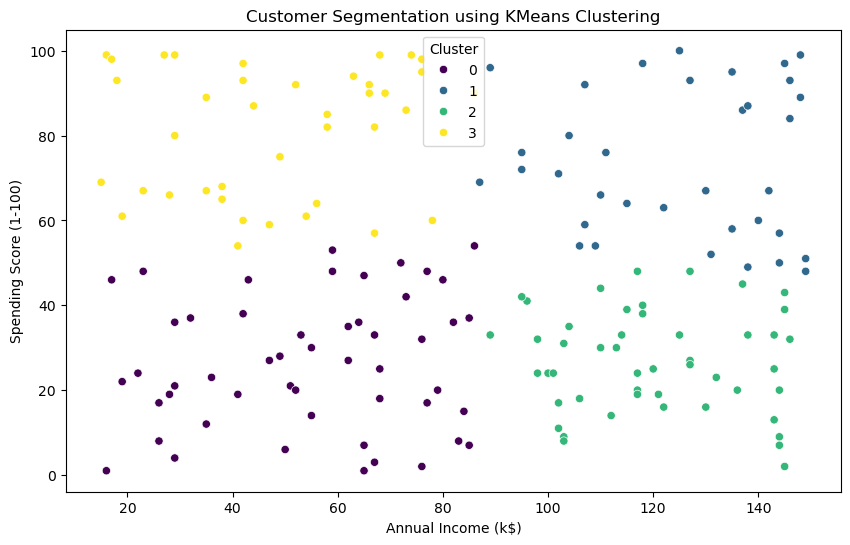

In [ ]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation using KMeans Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()